<a href="https://colab.research.google.com/github/Hazal-Y/Ad-Campaign-EDA-Python/blob/main/Ad_Campaign_EDA_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>   
      <font color = goldenrod >
            <span style='font-family:Georgia'>
            FACEBOOK AD CAMPAIGN EDA
            </span>   
        </font>    
</h1>

# Introduction

Objective:

The objective of this data is to analyze the effectiveness of Facebook ad campaigns. The data includes demographic information about the targeted audience and the performance metrics of the ad campaigns, such as the number of impressions, clicks, and total and approved conversions.

Scenario:

A marketing agency has been hired by a company to analyze the performance of their recent Facebook ad campaigns. The agency will use the provided data to identify the demographic characteristics of the target audience and determine which ad campaigns were most effective in generating interest and revenue. The insights gained from the analysis will be used to optimize future ad campaigns and improve the return on investment for the company.

**Limitations:**

The provenance of the datasets are not provided on the corresponding Kaggle pages.

**Data:**

The dataset for this EDA is from an anonymous organisation’s social media ad campaign, downloaded from Kaggle. It was created by merging two different datasets:

https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking

https://www.kaggle.com/datasets/madislemsalu/facebook-ad-campaign/discussion

The merger of the two datasets was necessary to ensure the accuracy and completeness of the information. One dataset was found to contain corrected versions of the other, with some columns removed. By merging the two datasets, I was able to consolidate the corrected information with the full data, providing a comprehensive and reliable source of information.



Content:

1- ad_id: an unique ID for each ad

2- campaign_id: company ID associated with each ad campaign

3- fb_campaign_id: an ID associated with how Facebook tracks each campaign

4- age: age of the person to whom the ad is shown

5- gender: gender of the person to whom the add is shown

6- interest 1: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile)

7- interest 2

8- interest 3

7- impressions: the number of times the ad was shown

8- clicks: number of clicks on for that ad

9- spent: Amount paid by the company to Facebook, to show the ad

10- total conversion: Total number of people who enquired about the product after seeing the ad

11- approved conversion: Total number of people who bought the product after seeing the ad

# Importing & Understanding the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Hazal-Y/Ad-Campaign-EDA/main/Ad_campaign_data.csv")

In [4]:
df.shape

(1143, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   int64  
 4   fb_campaign_id       1143 non-null   int64  
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  Impressions          1143 non-null   int64  
 11  Clicks               1143 non-null   int64  
 12  Spent                1143 non-null   float64
 13  Total_Conversion     1143 non-null   int64  
 14  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(10), object(4)
me

In [6]:
df.nunique()

ad_id                  1143
reporting_start          14
reporting_end            14
campaign_id               3
fb_campaign_id          691
age                       4
gender                    2
interest1                40
interest2                66
interest3                69
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

The campaign advertisements are divided into three distinct categories, which are:

In [7]:
df['campaign_id'].unique()

array([ 916,  936, 1178])

To make it easier to understand, these three categories will be referred to as Campaign_A, Campaign_B, and Campaign_C.

In [8]:
df['campaign_id'].replace({916:'Campaign_A', 936:'Campaign_B', 1178:'Campaign_C'}, inplace=True)

The timeframe of the data:

In [9]:
df['reporting_start'].min()

'17/08/2017'

In [10]:
df['reporting_end'].max()

'30/08/2017'

The data pertains to three advertising campaigns that were conducted over a span of 13 days, starting on July 17th and ending on July 30th, 2017.

In [11]:
df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

The target audience for the advertisements was individuals within the age range of 30 to 50 years old.

In [42]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,2017-08-17,17/08/2017,Campaign_A,103916,30-34,M,15,17,17,7350,1,1.43,2,1
1,708749,2017-08-17,17/08/2017,Campaign_A,103917,30-34,M,16,19,21,17861,2,1.82,2,0
2,708771,2017-08-17,17/08/2017,Campaign_A,103920,30-34,M,20,25,22,693,0,0.00,1,0
3,708815,2017-08-30,30/08/2017,Campaign_A,103928,30-34,M,28,32,32,4259,1,1.25,1,0
4,708818,2017-08-17,17/08/2017,Campaign_A,103928,30-34,M,28,33,32,4133,1,1.29,1,1


# Exploratory Analysis

In [13]:
df.describe()

,ad_id,fb_campaign_id,interest1,interest2,interest3,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,36.245844,36.222222,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,20500.308622,26.952131,26.937853,26.924679,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,103916.000000,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,20.000000,20.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,144549.000000,25.000000,28.000000,28.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,144657.500000,31.000000,35.000000,35.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,179982.000000,114.000000,118.000000,120.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


WRITE THE SUMMARY OF THE ABOVE FINDINGS HERE

## Heatmap

Categorical data will be converted into numerical data by creating binary columns for each category, using the 'get_dummies' function.

In [14]:
df1 = pd.get_dummies(df, columns = ['campaign_id', 'age', 'gender'])

The 'id' and 'interest' columns were omitted as the numerical values in these columns have no significance with regards to the correlation analysis being performed:

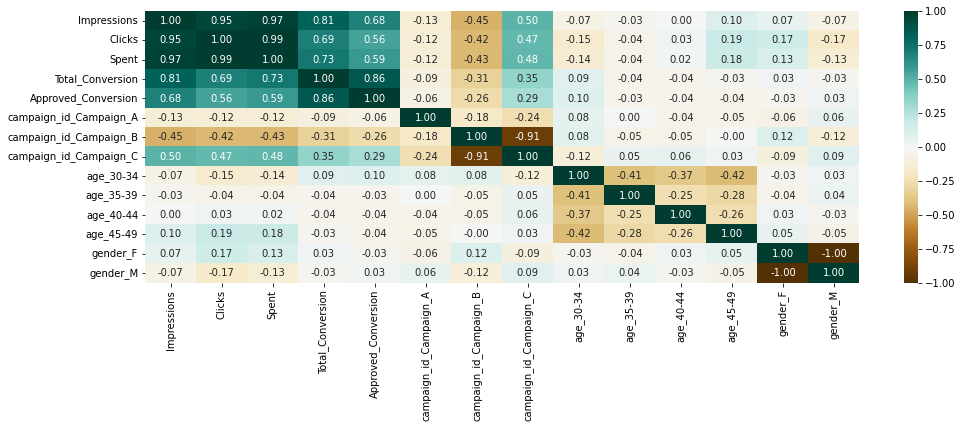

In [15]:
#@title Heatmap chart
plt.figure(figsize=(16,5))
x=sns.heatmap(df1[df1.columns.difference(['ad_id','fb_campaign_id','campaign_id', 'interest1','interest2','interest3'], sort=False)].corr(),annot=True ,fmt=".2f", cmap="BrBG")

- Conversions are positively correlated with customers in the 30-34 age group --> these customers are more likely to inquire and purchase the product than other age groups.

- Clicks are positively correlated with the age groups 40-44 and 45-49 --> this age group is more likely to click on the advertisement.

- However, the correlation of conversions with this age group is negative --> they have a lower rate of inquiring and completing purchases compared to younger age groups.

- Female customers are more likely to click on the advertisement and inquire about the product. However, after inquiring, males' tendency to purchase the product is higher.

- Campaign A and B were targeted towards younger customers, as there is a positive correlation with the 30-34 age group. On the other hand, Campaign C was targeted towards older customers, as there is a negative correlation with the 30-34 age group.


## Preliminary Analysis

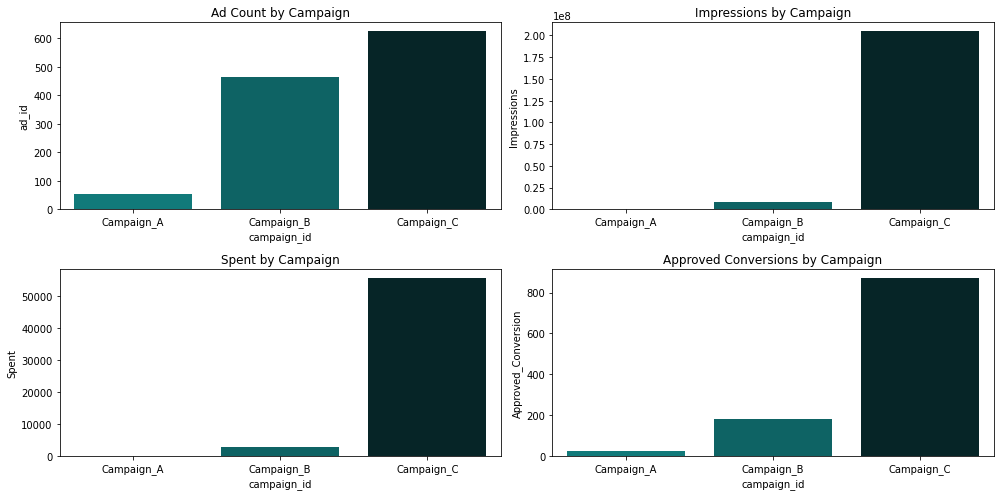

In [43]:
#@title Overview
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

purple_palette = sns.color_palette(['#008b8b', '#007172', '#002a2c'])

sns.barplot(x='campaign_id', y='ad_id', data=df.groupby(by=['campaign_id']).ad_id.count().reset_index(), ax=axs[0, 0], palette=purple_palette).set_title('Ad Count by Campaign')
sns.barplot(x='campaign_id', y='Impressions', data=df.groupby(['campaign_id'])['Impressions'].sum().reset_index(), ax=axs[0, 1], palette=purple_palette).set_title('Impressions by Campaign')
sns.barplot(x='campaign_id', y='Spent', data=df.groupby(['campaign_id'])['Spent'].sum().reset_index(), ax=axs[1, 0], palette=purple_palette).set_title('Spent by Campaign')
sns.barplot(x='campaign_id', y='Approved_Conversion', data=df.groupby(['campaign_id'])['Approved_Conversion'].sum().reset_index(), ax=axs[1, 1], palette=purple_palette).set_title('Approved Conversions by Campaign')

plt.tight_layout()
plt.show()

Campaign C has the highest ad spend and highest conversions which is consistent with its high impressions in the previous chart. Further KPI analysis is needed to understand the relationship between these variables better.

## KPIs

In [17]:
CampaignSum = df.groupby(by=['campaign_id']).sum()
Campaign_CTR = CampaignSum['Clicks']/CampaignSum['Impressions']*100
Campaign_CPC = CampaignSum['Spent']/CampaignSum['Clicks']*100
Campaign_CR = CampaignSum['Approved_Conversion']/CampaignSum['Clicks']*100
Campaign_CPM = CampaignSum['Spent']/CampaignSum['Impressions']*1000
Campaign_CPCon = CampaignSum['Spent']/CampaignSum['Approved_Conversion']*100
Campaign_CPI = CampaignSum['Approved_Conversion']/CampaignSum['Impressions']*100

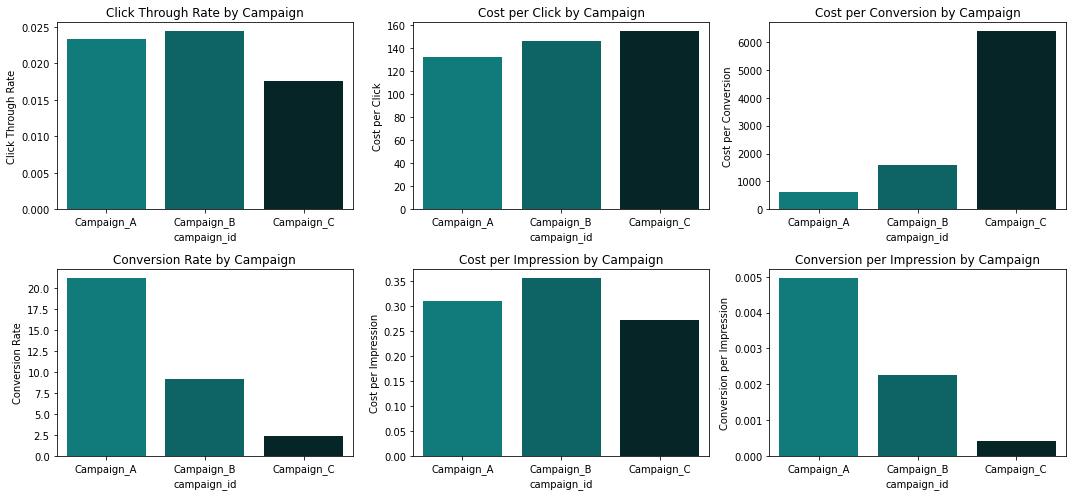

In [18]:
#@title CTR, CPC, CR, CPM, CPCon, CPI by Campaign
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
purple_palette = sns.color_palette(['#008b8b', '#007172', '#002a2c'])
sns.barplot(x=Campaign_CTR.index, y=Campaign_CTR, ax=ax[0,0], palette=purple_palette).set_title('Click Through Rate by Campaign')
ax[0,0].set_ylabel('Click Through Rate')
sns.barplot(x=Campaign_CPC.index, y=Campaign_CPC, ax=ax[0,1], palette=purple_palette).set_title('Cost per Click by Campaign')
ax[0,1].set_ylabel('Cost per Click')
sns.barplot(x=Campaign_CR.index, y=Campaign_CR, ax=ax[1,0], palette=purple_palette).set_title('Conversion Rate by Campaign')
ax[1,0].set_ylabel('Conversion Rate')
sns.barplot(x=Campaign_CPM.index, y=Campaign_CPM, ax=ax[1,1], palette=purple_palette).set_title('Cost per Impression by Campaign')
ax[1,1].set_ylabel('Cost per Impression')
sns.barplot(x=Campaign_CPCon.index, y=Campaign_CPCon, ax=ax[0,2], palette=purple_palette).set_title('Cost per Conversion by Campaign')
ax[0,2].set_ylabel('Cost per Conversion')
sns.barplot(x=Campaign_CPI.index, y=Campaign_CPI, ax=ax[1,2], palette=purple_palette).set_title('Conversion per Impression by Campaign')
ax[1,2].set_ylabel('Conversion per Impression')

plt.tight_layout()
plt.show()

Campaign A & B have higher CTR's indicating they either have a more effective message or better targeting than campaign C. 

also campaign C conversion rate'leri dusuk ama cost related degerler yuksek.

## Further Analysis

### Timeframe

In [19]:
df['reporting_start'] = pd.to_datetime(df['reporting_start'])
df.reporting_start

0      2017-08-17
1      2017-08-17
2      2017-08-17
3      2017-08-30
4      2017-08-17
          ...    
1138   2017-08-19
1139   2017-08-19
1140   2017-08-19
1141   2017-08-17
1142   2017-08-17
Name: reporting_start, Length: 1143, dtype: datetime64[ns]

In [20]:
grouped_reporting_start = df.groupby('reporting_start').agg({'Impressions':'sum', 'Clicks': 'sum', 'Spent': 'sum', 'Approved_Conversion': 'sum'})
sum_df = grouped_reporting_start.reset_index()
sum_df

,reporting_start,Impressions,Clicks,Spent,Approved_Conversion
0,2017-08-17,16440386,3466,4961.959980,68
1,2017-08-18,13685544,2565,3840.609991,73
2,2017-08-19,17914341,3469,5177.749985,79
3,2017-08-20,16246436,2843,4369.090002,84
4,2017-08-21,10967797,1909,2854.630000,63
5,2017-08-22,11155133,1644,2510.880004,84
6,2017-08-23,18892899,2692,4408.970001,130
7,2017-08-24,14075359,2954,4453.489989,62
8,2017-08-25,13777795,2346,3675.230001,80
9,2017-08-26,15177449,2726,4374.199998,67


In [21]:
sum_df['Impressions_10'] = sum_df['Impressions'] / 10000

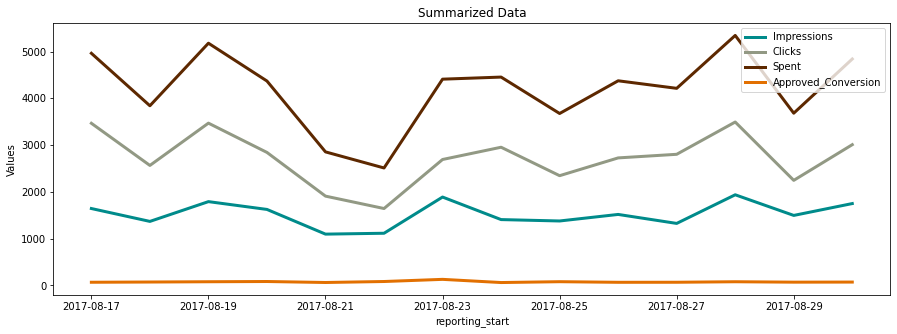

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(sum_df['reporting_start'], sum_df['Impressions_10'], color='darkcyan', label='Impressions', linewidth=3)
ax.plot(sum_df['reporting_start'], sum_df['Clicks'], color='#929984', label='Clicks', linewidth=3)
ax.plot(sum_df['reporting_start'], sum_df['Spent'], color='#5d2800', label='Spent', linewidth=3)
ax.plot(sum_df['reporting_start'], sum_df['Approved_Conversion'], color='#e27001', label='Approved_Conversion', linewidth=3)

ax.set_xlabel('reporting_start')
ax.set_ylabel('Values')
ax.set_title('Summarized Data')

ax.legend()
plt.show()


In [23]:
reporting_start_sum = df.groupby('reporting_start').sum()
reporting_start_sum['CTR'] = reporting_start_sum['Clicks']/reporting_start_sum['Impressions']*1000
reporting_start_sum['CPC'] = reporting_start_sum['Spent']/reporting_start_sum['Clicks']/10
reporting_start_sum['CR'] = reporting_start_sum['Approved_Conversion']/reporting_start_sum['Clicks']
reporting_start_sum['CPM'] = reporting_start_sum['Spent']/reporting_start_sum['Impressions']*1000
reporting_start_sum['CPCon'] = reporting_start_sum['Spent']/reporting_start_sum['Approved_Conversion']/100
reporting_start_sum['CPI'] = reporting_start_sum['Approved_Conversion']/reporting_start_sum['Impressions']*10000

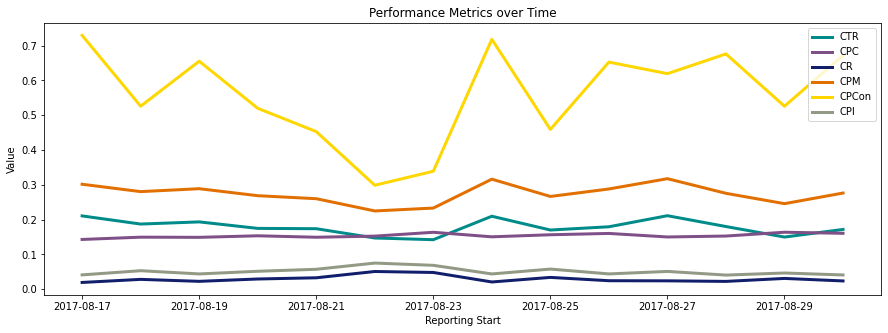

In [24]:
plt.subplots(figsize=(15, 5))
plt.plot(reporting_start_sum.index, reporting_start_sum['CTR'], color='darkcyan', label='CTR', linewidth=3)
plt.plot(reporting_start_sum.index, reporting_start_sum['CPC'], color='#7f5087', label='CPC', linewidth=3)
plt.plot(reporting_start_sum.index, reporting_start_sum['CR'], color='#111e6c', label='CR', linewidth=3)
plt.plot(reporting_start_sum.index, reporting_start_sum['CPM'], color='#e27001', label='CPM', linewidth=3)
plt.plot(reporting_start_sum.index, reporting_start_sum['CPCon'], color='gold', label='CPCon', linewidth=3)
plt.plot(reporting_start_sum.index, reporting_start_sum['CPI'], color='#929984', label='CPI', linewidth=3)

plt.title('Performance Metrics over Time')
plt.xlabel('Reporting Start')
plt.ylabel('Value')
plt.legend()
plt.show()

### Interest - to be added

## Demographics

### Gender

In [38]:
GenderSum = df.groupby(by=['gender']).sum()

In [26]:
GenderSum.reset_index()

,gender,ad_id,fb_campaign_id,interest1,interest2,interest3,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_count
0,F,537521634,73269823,18781,20694,20631,114862847,23878,34502.619963,1644,495,551
1,M,590917838,79645277,18671,20735,20771,98571981,14287,24202.609995,1620,584,592


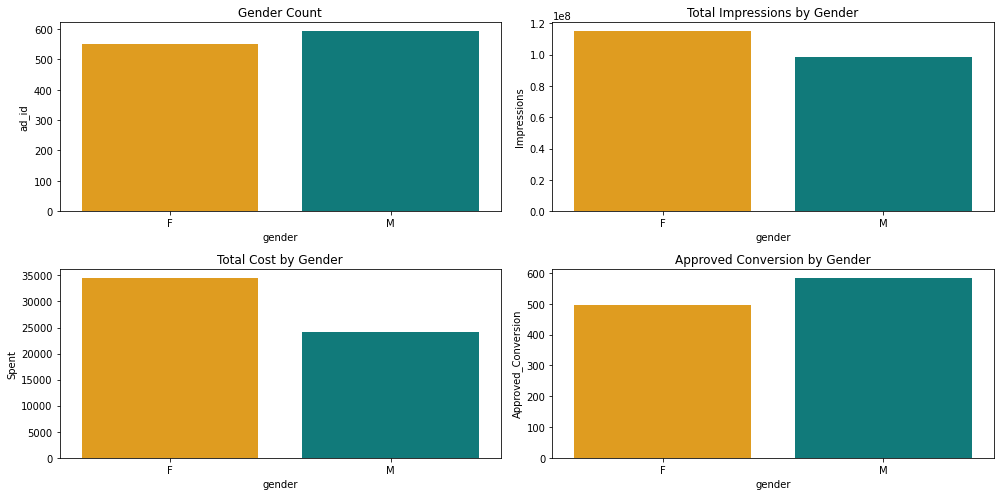

In [44]:
#@title Gender - Overview
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

sns.barplot(x='gender', y='ad_id', data=df.groupby(by=['gender']).ad_id.count().reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 0]).set_title('Gender Count')
sns.barplot(x='gender', y='Impressions', data=GenderSum.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 1]).set_title('Total Impressions by Gender')
sns.barplot(x='gender', y='Spent', data=GenderSum.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 0]).set_title('Total Cost by Gender')
sns.barplot(x='gender', y='Approved_Conversion', data=GenderSum.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 1]).set_title('Approved Conversion by Gender')

plt.tight_layout()
plt.show()

In [ ]:
GenderSum_CTR = GenderSum['Clicks']/GenderSum['Impressions']*100
GenderSum_CPC = GenderSum['Spent']/GenderSum['Clicks']*100
GenderSum_CR = GenderSum['Approved_Conversion']/GenderSum['Clicks']*100
GenderSum_CPM = GenderSum['Spent']/GenderSum['Impressions']*1000
GenderSum_CPCon = GenderSum['Spent']/GenderSum['Approved_Conversion']*100
GenderSum_CPI = GenderSum['Approved_Conversion']/GenderSum['Impressions']*100 

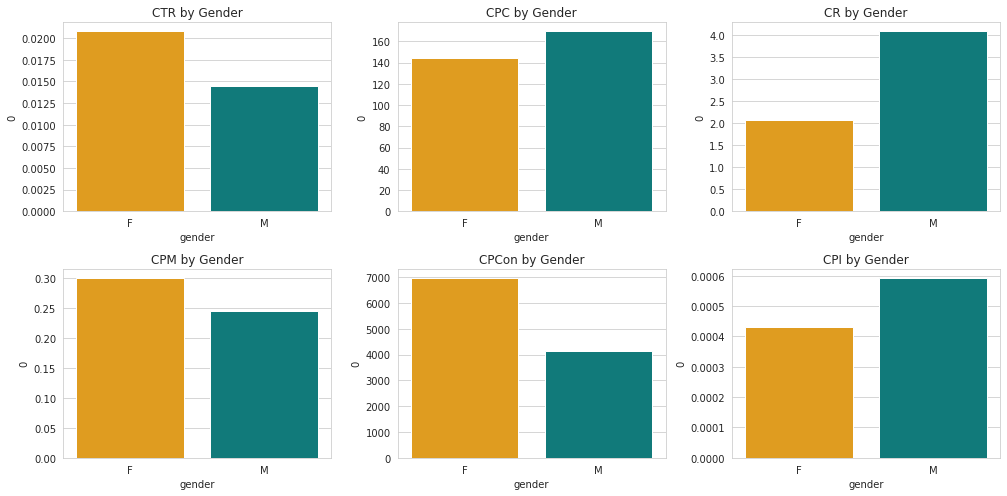

In [ ]:
#@title KPIs by Gender
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))

sns.barplot(x='gender', y=0, data=GenderSum_CTR.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 0]).set_title('CTR by Gender')
sns.barplot(x='gender', y=0, data=GenderSum_CPC.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 1]).set_title('CPC by Gender')
sns.barplot(x='gender', y=0, data=GenderSum_CR.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 2]).set_title('CR by Gender')
sns.barplot(x='gender', y=0, data=GenderSum_CPM.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 0]).set_title('CPM by Gender')
sns.barplot(x='gender', y=0, data=GenderSum_CPCon.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 1]).set_title('CPCon by Gender')
sns.barplot(x='gender', y=0, data=GenderSum_CPI.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 2]).set_title('CPI by Gender')

plt.tight_layout()
plt.show()

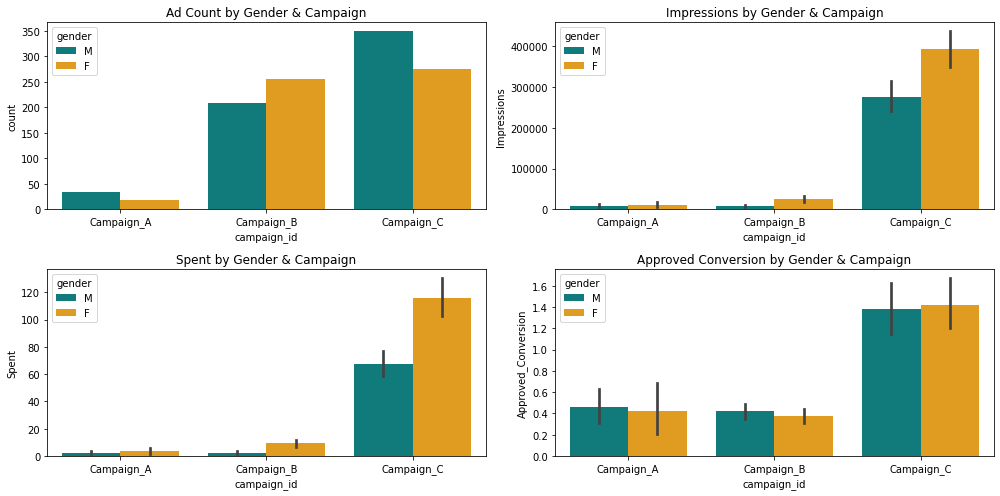

In [45]:
#@title Gender & Campaign - Overview
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

sns.countplot(data=df, x='campaign_id', hue='gender', palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 0]).set_title('Ad Count by Gender & Campaign')
sns.barplot(x='campaign_id', y='Impressions', hue='gender', palette={"F": "orange", "M":"darkcyan"}, data=df, ax=axs[0, 1]).set_title('Impressions by Gender & Campaign')
sns.barplot(x='campaign_id', y='Spent', hue='gender', palette={"F": "orange", "M":"darkcyan"}, data=df, ax=axs[1, 0]).set_title('Spent by Gender & Campaign')
sns.barplot(x='campaign_id', y='Approved_Conversion', hue='gender', palette={"F": "orange", "M":"darkcyan"}, data=df, ax=axs[1, 1]).set_title('Approved Conversion by Gender & Campaign')

plt.tight_layout()
plt.show()

KPI calculation for Gender and Campaign

In [ ]:
GenCampaignSum = df.groupby(by = ['campaign_id', 'gender']).sum()
GenCampaign_CTR = GenCampaignSum['Clicks']/GenCampaignSum['Impressions']*100
GenCampaign_CPC = GenCampaignSum['Spent']/GenCampaignSum['Clicks']*100
GenCampaign_CR = GenCampaignSum['Approved_Conversion']/GenCampaignSum['Clicks']*100
GenCampaign_CPM = GenCampaignSum['Spent']/GenCampaignSum['Impressions']*1000
GenCampaign_CPCon = GenCampaignSum['Spent']/GenCampaignSum['Approved_Conversion']*100
GenCampaign_CPI = GenCampaignSum['Approved_Conversion']/GenCampaignSum['Impressions']*100

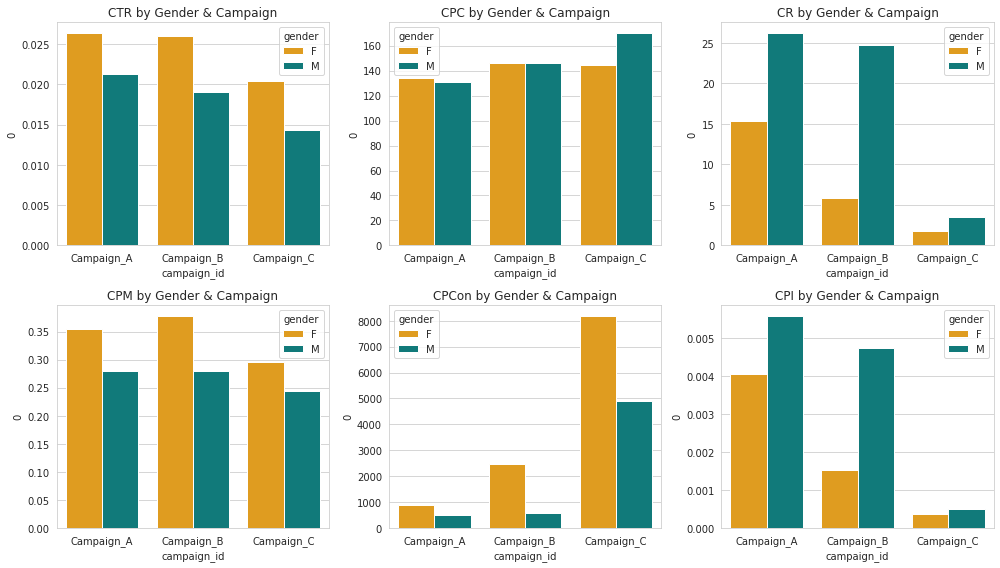

In [ ]:
#@title KPIs by Gender & Campaign
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

sns.barplot(x='campaign_id', y=0, hue='gender', data=GenCampaign_CTR.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 0]).set_title('CTR by Gender & Campaign')
sns.barplot(x='campaign_id', y=0, hue='gender', data=GenCampaign_CPC.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 1]).set_title('CPC by Gender & Campaign')
sns.barplot(x='campaign_id', y=0, hue='gender', data=GenCampaign_CR.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[0, 2]).set_title('CR by Gender & Campaign')
sns.barplot(x='campaign_id', y=0, hue='gender', data=GenCampaign_CPM.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 0]).set_title('CPM by Gender & Campaign')
sns.barplot(x='campaign_id', y=0, hue='gender', data=GenCampaign_CPCon.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 1]).set_title('CPCon by Gender & Campaign')
sns.barplot(x='campaign_id', y=0, hue='gender', data=GenCampaign_CPI.reset_index(), palette={"F": "orange", "M":"darkcyan"}, ax=axs[1, 2]).set_title('CPI by Gender & Campaign')

plt.tight_layout()
plt.show()

### Age

In [ ]:
# ilkini count plot'la yaz

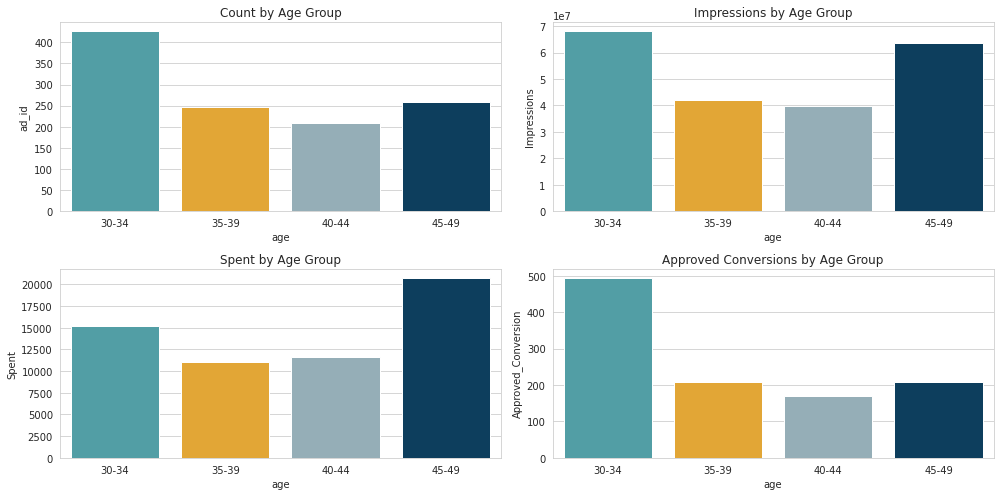

In [ ]:
#@title Age - Overview
fig, axs = plt.subplots(2, 2, figsize=(14, 7))
age_palette = sns.color_palette(['#44aab3', '#ffae19', '#8fb0bd', '#00416a'])

sns.barplot(x='age', y='ad_id', data=df.groupby(['age']).count().reset_index(), palette=age_palette, ax=axs[0, 0]).set_title('Count by Age Group')
sns.barplot(x='age', y='Impressions', data=df.groupby(['age'])['Impressions'].sum().reset_index(), palette=age_palette, ax=axs[0, 1]).set_title('Impressions by Age Group')
sns.barplot(x='age', y='Spent', data=df.groupby(['age'])['Spent'].sum().reset_index(), palette=age_palette, ax=axs[1, 0]).set_title('Spent by Age Group')
sns.barplot(x='age', y='Approved_Conversion', data=df.groupby(['age'])['Approved_Conversion'].sum().reset_index(), palette=age_palette, ax=axs[1, 1]).set_title('Approved Conversions by Age Group')

plt.tight_layout()
plt.show()

In [ ]:
AgeSum = df.groupby(by=['age']).sum()
AgeSum_CTR = AgeSum['Clicks']/AgeSum['Impressions']*100
AgeSum_CPC = AgeSum['Spent']/AgeSum['Clicks']*100
AgeSum_CR = AgeSum['Approved_Conversion']/AgeSum['Clicks']*100
AgeSum_CPM = AgeSum['Spent']/AgeSum['Impressions']*1000
AgeSum_CPCon = AgeSum['Spent']/AgeSum['Approved_Conversion']*100
AgeSum_CPI = AgeSum['Approved_Conversion']/AgeSum['Impressions']*100 

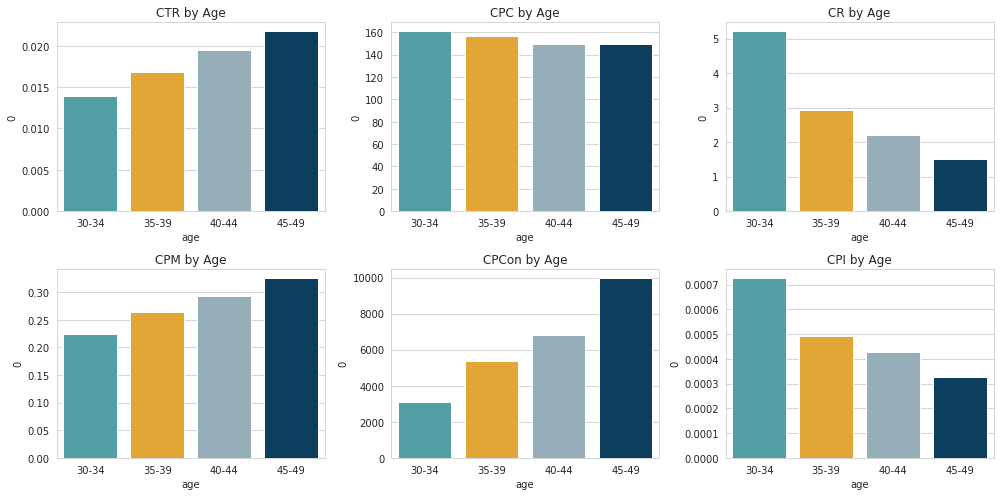

In [ ]:
#@title KPIs by Age
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))
age_palette = sns.color_palette(['#44aab3', '#ffae19', '#8fb0bd', '#00416a'])

sns.barplot(x='age', y=0, data=AgeSum_CTR.reset_index(), palette=age_palette, ax=axs[0, 0]).set_title('CTR by Age')
sns.barplot(x='age', y=0, data=AgeSum_CPC.reset_index(), palette=age_palette, ax=axs[0, 1]).set_title('CPC by Age')
sns.barplot(x='age', y=0, data=AgeSum_CR.reset_index(), palette=age_palette, ax=axs[0, 2]).set_title('CR by Age')
sns.barplot(x='age', y=0, data=AgeSum_CPM.reset_index(), palette=age_palette, ax=axs[1, 0]).set_title('CPM by Age')
sns.barplot(x='age', y=0, data=AgeSum_CPCon.reset_index(), palette=age_palette, ax=axs[1, 1]).set_title('CPCon by Age')
sns.barplot(x='age', y=0, data=AgeSum_CPI.reset_index(), palette=age_palette, ax=axs[1, 2]).set_title('CPI by Age')

plt.tight_layout()
plt.show()

In [ ]:
# ilkini countplot'la yaz

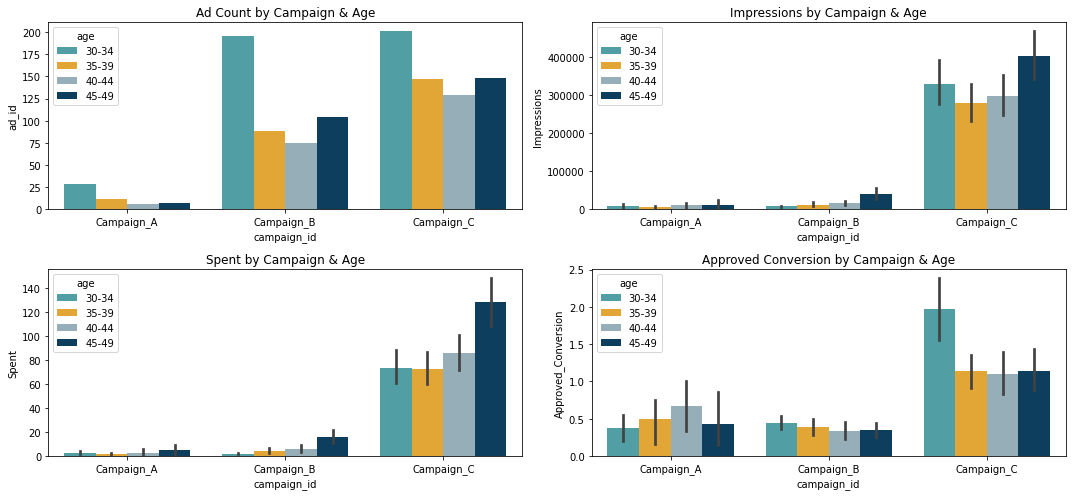

In [46]:
#@title Age & Campaign - Overview
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
age_palette = sns.color_palette(['#44aab3', '#ffae19', '#8fb0bd', '#00416a'])

sns.barplot(x='campaign_id', y='ad_id', hue='age', data=df.groupby(['campaign_id', 'age']).count().reset_index(), palette=age_palette, ax=axs[0, 0]).set_title('Ad Count by Campaign & Age')
sns.barplot(x='campaign_id', y='Impressions', hue='age', data=df, palette=age_palette, ax=axs[0, 1]).set_title('Impressions by Campaign & Age')
sns.barplot(x='campaign_id', y='Spent', hue='age', data=df, palette=age_palette, ax=axs[1, 0]).set_title('Spent by Campaign & Age')
sns.barplot(x='campaign_id', y='Approved_Conversion', hue='age', data=df, palette=age_palette, ax=axs[1, 1]).set_title('Approved Conversion by Campaign & Age')
plt.tight_layout()
plt.show()

In [ ]:
AgeCampaignSum = df.groupby(by=['campaign_id', 'age']).sum()
AgeCampaignSum_CTR = AgeCampaignSum['Clicks']/AgeCampaignSum['Impressions']*100
AgeCampaignSum_CPC = AgeCampaignSum['Spent']/AgeCampaignSum['Clicks']*100
AgeCampaignSum_CR = AgeCampaignSum['Approved_Conversion']/AgeCampaignSum['Clicks']*100
AgeCampaignSum_CPM = AgeCampaignSum['Spent']/AgeCampaignSum['Impressions']*1000
AgeCampaignSum_CPCon = AgeCampaignSum['Spent']/AgeCampaignSum['Approved_Conversion']*100
AgeCampaignSum_CPI = AgeCampaignSum['Approved_Conversion']/AgeCampaignSum['Impressions']*100 

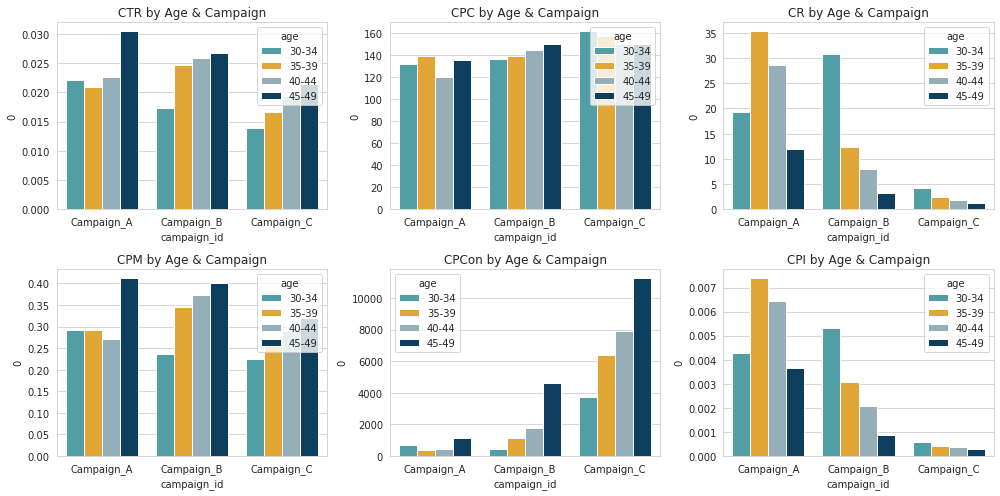

In [ ]:
#@title KPIs by Age & Campaign
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))
age_palette = sns.color_palette(['#44aab3', '#ffae19', '#8fb0bd', '#00416a'])

sns.barplot(x='campaign_id', y=0, hue='age', data=AgeCampaignSum_CTR.reset_index(), palette=age_palette, ax=axs[0, 0]).set_title('CTR by Age & Campaign')
sns.barplot(x='campaign_id', y=0, hue='age', data=AgeCampaignSum_CPC.reset_index(), palette=age_palette, ax=axs[0, 1]).set_title('CPC by Age & Campaign')
sns.barplot(x='campaign_id', y=0, hue='age', data=AgeCampaignSum_CR.reset_index(), palette=age_palette, ax=axs[0, 2]).set_title('CR by Age & Campaign')
sns.barplot(x='campaign_id', y=0, hue='age', data=AgeCampaignSum_CPM.reset_index(), palette=age_palette, ax=axs[1, 0]).set_title('CPM by Age & Campaign')
sns.barplot(x='campaign_id', y=0, hue='age', data=AgeCampaignSum_CPCon.reset_index(), palette=age_palette, ax=axs[1, 1]).set_title('CPCon by Age & Campaign')
sns.barplot(x='campaign_id', y=0, hue='age', data=AgeCampaignSum_CPI.reset_index(), palette=age_palette, ax=axs[1, 2]).set_title('CPI by Age & Campaign')

plt.tight_layout()
plt.show()

### Age & Gender - to be added

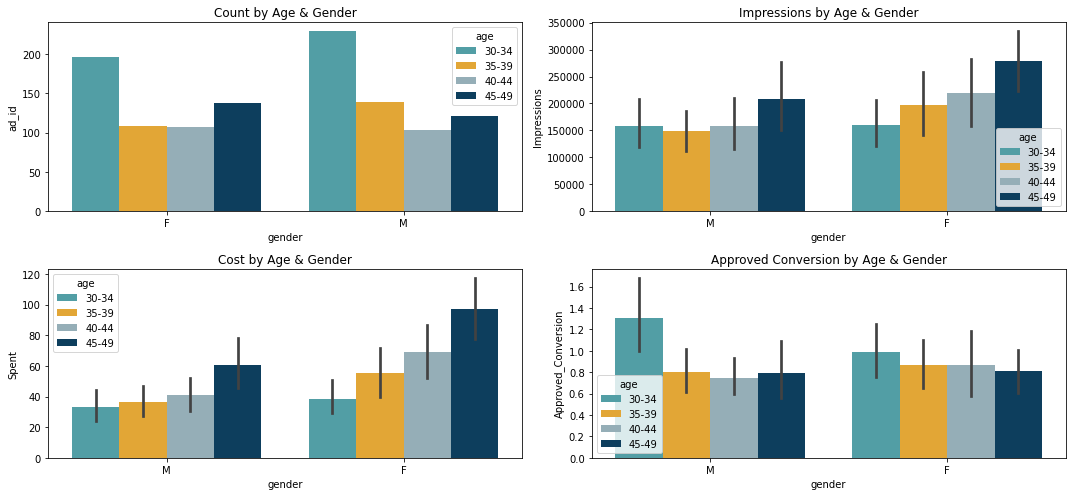

In [47]:
#@title Age & Gender - Overview
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
age_palette = sns.color_palette(['#44aab3', '#ffae19', '#8fb0bd', '#00416a'])

sns.barplot(x='gender', y='ad_id', hue='age', data=df.groupby(['gender', 'age']).count().reset_index(), palette=age_palette, ax=axs[0, 0]).set_title('Count by Age & Gender')
sns.barplot(x='gender', y='Impressions', hue='age', data=df, palette=age_palette, ax=axs[0, 1]).set_title('Impressions by Age & Gender')
sns.barplot(x='gender', y='Spent', hue='age', data=df, palette=age_palette, ax=axs[1, 0]).set_title('Cost by Age & Gender')
sns.barplot(x='gender', y='Approved_Conversion', hue='age', data=df, palette=age_palette, ax=axs[1, 1]).set_title('Approved Conversion by Age & Gender')
plt.tight_layout()
plt.show()

In [ ]:
GenderAgeSum = df.groupby(by=['gender', 'age']).sum()
GenderAgeSum_CTR = GenderAgeSum['Clicks']/GenderAgeSum['Impressions']*100
GenderAgeSum_CPC = GenderAgeSum['Spent']/GenderAgeSum['Clicks']*100
GenderAgeSum_CR = GenderAgeSum['Approved_Conversion']/GenderAgeSum['Clicks']*100
GenderAgeSum_CPM = GenderAgeSum['Spent']/GenderAgeSum['Impressions']*1000
GenderAgeSum_CPCon = GenderAgeSum['Spent']/GenderAgeSum['Approved_Conversion']*100
GenderAgeSum_CPI = GenderAgeSum['Approved_Conversion']/GenderAgeSum['Impressions']*100 

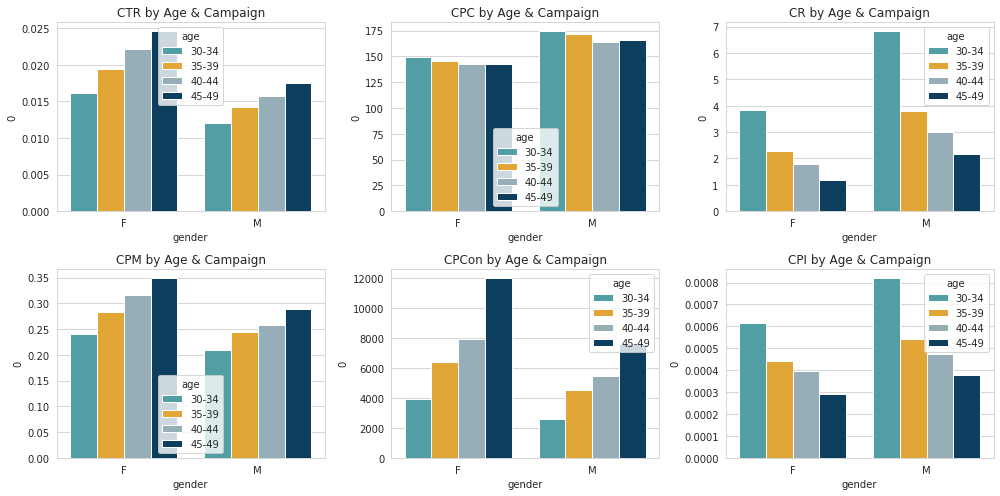

In [ ]:
#@title KPIs by Age & Gender
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))
age_palette = sns.color_palette(['#44aab3', '#ffae19', '#8fb0bd', '#00416a'])

sns.barplot(x='gender', y=0, hue='age', data=GenderAgeSum_CTR.reset_index(), palette=age_palette, ax=axs[0, 0]).set_title('CTR by Age & Campaign')
sns.barplot(x='gender', y=0, hue='age', data=GenderAgeSum_CPC.reset_index(), palette=age_palette, ax=axs[0, 1]).set_title('CPC by Age & Campaign')
sns.barplot(x='gender', y=0, hue='age', data=GenderAgeSum_CR.reset_index(), palette=age_palette, ax=axs[0, 2]).set_title('CR by Age & Campaign')
sns.barplot(x='gender', y=0, hue='age', data=GenderAgeSum_CPM.reset_index(), palette=age_palette, ax=axs[1, 0]).set_title('CPM by Age & Campaign')
sns.barplot(x='gender', y=0, hue='age', data=GenderAgeSum_CPCon.reset_index(), palette=age_palette, ax=axs[1, 1]).set_title('CPCon by Age & Campaign')
sns.barplot(x='gender', y=0, hue='age', data=GenderAgeSum_CPI.reset_index(), palette=age_palette, ax=axs[1, 2]).set_title('CPI by Age & Campaign')

plt.tight_layout()
plt.show()